<a href="https://colab.research.google.com/github/geopard26/MDS/blob/main/%D0%98%D0%A2%D0%B2%D0%9F%D0%94_Homework_4_%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом практическом задании вы будете работать с данными о пассажирах затонувшего Титаника.

Описание данных, а также сами данные (откуда их следует скачать) можно найти по следующей ссылке:

https://www.kaggle.com/c/titanic/data


Обратите внимание, что **это задание оценивается**.


Откройте файл данных («train.csv») в блокноте. Какой размер таблицы? Выведите первые 5 и последние 5 строк.

In [2]:
# your code here
import pandas as pd

In [5]:
titanic_data = pd.read_csv("/content/train.csv")

# Display the first few rows of the dataset
titanic_data.head()
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


У нас есть следующие данные:

PassengerId: ID пассажира

Survived: 0 (не выжил) или 1 (выжил)

Pclass: Класс пассажира (1, 2 или 3)

Name: Имя пассажира

Sex: Пол пассажира

Age: Возраст пассажира

SibSp: Количество братьев, сестер или супругов на борту

Parch: Количество родителей или детей на борту

Ticket: Номер билета

Fare: Цена билета

Cabin: Номер каюты

Embarked: Порт посадки (C = Cherbourg; Q = Queenstown; S = Southampton)

### 1

Какова доля пассажиров, выживших в катастрофе? Каково соотношение мужчин и женщин среди выживших?

In [12]:
# Рассчитаем долю выживших пассажиров и соотношение мужчин и женщин среди выживших.
# Какова доля пассажиров, выживших в катастрофе?
survival_rate = titanic_data['Survived'].mean()
print(survival_rate)

0.3838383838383838
342
0.3838383838383838


(0.3838383838383838,
 female    0.681287
 male      0.318713
 Name: Sex, dtype: float64)

In [ ]:
# Проведем проверку
# Сколько всего человек выжило в катастрофе?
survival_rate_sum = titanic_data['Survived'].sum()
print(survival_rate_sum)

In [15]:
# Проверим получившееся значение в survival_rate
survival_rate_check = survival_rate_sum/len(titanic_data['Survived'])
print(survival_rate_check)

0.3838383838383838


In [14]:
# Сравним получившееся значение с survival_rate
print(survival_rate == survival_rate_check)

True


In [20]:
# создадим отдельную таблицу с выжившими, чтобы было удобно работать
survivors = titanic_data[titanic_data['Survived'] == 1]
print(survivors.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


In [23]:
# Каково соотношение мужчин и женщин среди выживших?
male_survivors = survivors[survivors['Sex'] == 'male'].shape[0]
female_survivors = survivors[survivors['Sex'] == 'female'].shape[0]
print("Количество выживших мужчин: ", male_survivors)
print("Количество выживших женщин: ", female_survivors)

Количество выживших мужчин:  109
Количество выживших женщин:  233


In [24]:
print("Отношение выживших женщин к выжившим мужчинам: ", female_survivors/male_survivors)

Отношение выживших женщин к выжившим мужчинам:  2.1376146788990824


### 2

Сколько пассажиров было в каждом классе? Кого было больше в самом многолюдном классе – мужчин или женщин?

In [32]:
# your code here
# Посчитаем количество пассажиров в каждом классе
passengers_in_class = titanic_data['Pclass'].value_counts()

# Выявим самый многолюдный класс
most_populated_class = passengers_in_class.idxmax()
print("Самый многолюдный класс: ", most_populated_class)

# Посчитаем мужчин и женщин в 3-м классе
male_in_most_populated = titanic_data[(titanic_data['Pclass'] == most_populated_class) & (titanic_data['Sex'] == 'male')].shape[0]
female_in_most_populated = titanic_data[(titanic_data['Pclass'] == most_populated_class) & (titanic_data['Sex'] == 'female')].shape[0]

print("Мужчин в самом многолюдном классе было: ", male_in_most_populated)
print("Женщин в самом многолюдном классе было: ", female_in_most_populated)

Самый многолюдный класс:  3
Мужчин в самом многолюдном классе было:  347
Женщин в самом многолюдном классе было:  144


### 3

Выведите минимальную, среднюю и максимальную сумму, которую пассажиры заплатили за проезд. Сделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Распечатайте гистограммы, показывающие распределение цен на билеты в зависимости от места посадки. Что можно сказать о результатах, которые вы получили?

In [35]:
# Рассчет минимальной, средней и максимальной стоимости билета для всех пассажиров
all_passengers_fare = {
    "Минимальная сумма": data["Fare"].min(),
    "Средняя сумма": data["Fare"].mean(),
    "Максимальная сумма": data["Fare"].max()
}

# Рассчет минимальной, средней и максимальной стоимости билета для пассажиров, которые сели в Саутгемптоне
southampton_passengers_fare = {
    "Минимальная сумма": data[data["Embarked"] == "S"]["Fare"].min(),
    "Средняя сумма": data[data["Embarked"] == "S"]["Fare"].mean(),
    "Максимальная сумма": data[data["Embarked"] == "S"]["Fare"].max()
}

print("Все пассажиры: ", all_passengers_fare)
print("Пассажиры, севшие в Саутгемптоне: ",southampton_passengers_fare)



Все пассажиры:  {'Минимальная сумма': 0.0, 'Средняя сумма': 32.204207968574636, 'Максимальная сумма': 512.3292}
Пассажиры, севшие в Саутгемптоне:  {'Минимальная сумма': 0.0, 'Средняя сумма': 27.079811801242233, 'Максимальная сумма': 263.0}


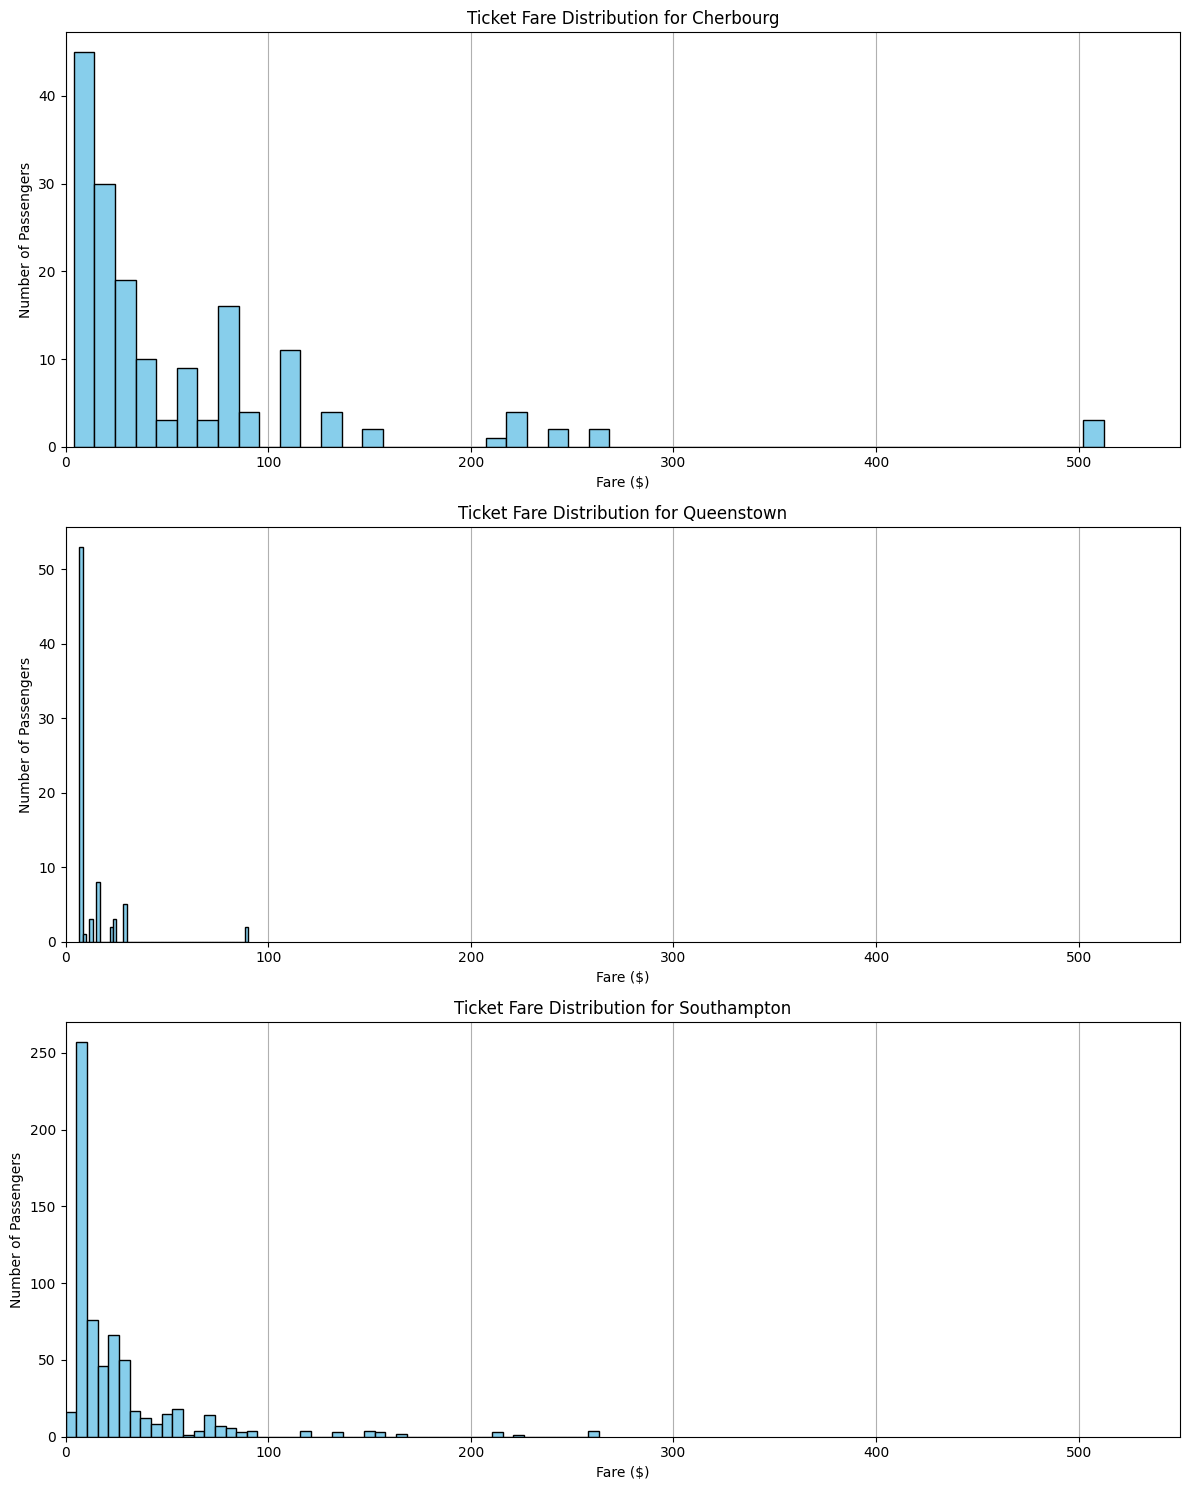

In [37]:
import matplotlib.pyplot as plt

# Гистограммы распределения стоимости билетов в зависимости от места посадки
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

embarkation_ports = ["C", "Q", "S"]
port_names = ["Cherbourg", "Queenstown", "Southampton"]

for i, port in enumerate(embarkation_ports):
    data[data["Embarked"] == port]["Fare"].hist(ax=ax[i], bins=50, color='skyblue', edgecolor='black')
    ax[i].set_title(f"Ticket Fare Distribution for {port_names[i]}")
    ax[i].set_xlabel("Fare ($)")
    ax[i].set_ylabel("Number of Passengers")
    ax[i].set_xlim(0, 550)
    ax[i].grid(axis='y')

plt.tight_layout()
plt.show()


### 4

Все ли признаки несут полезную информацию? Почему? Избавьтесь от ненужных столбцов. Обоснуйте свой выбор

In [40]:
# your code here

# Удаление столбцов 'PassengerId' и 'Ticket'
data_cleaned = titanic_data.drop(columns=['PassengerId', 'Ticket'])

data_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


Удалены столбцы PassengerId и Ticket, оставим остальные, так как они могут нести полезную информацию для анализа или прогнозирования.

Почему?

PassengerId является простым идентификатором и не содержит полезной информации для анализа.

Ticket также представляет собой уникальный идентификатор и вряд ли может быть использован для извлечения полезных закономерностей.
Оставшиеся признаки могут иметь влияние на вероятность выживания или быть полезными для других аналитических задач.​

### 5

Есть ли пропуски в данных? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [42]:
# your code here
# Поиск пропусков в данных
missing_values = data_cleaned.isnull().sum()

# Фильтрация столбцов, в которых есть пропуски
missing_values = missing_values[missing_values > 0]
print(missing_values)

Age         177
Cabin       687
Embarked      2
dtype: int64


### 6

Подумайте, как заполнить пробелы в каждом столбце, и сделайте это. Проверьте, чтобы нигде не было пропусков

Возраст лучше заполнить медианным значением. Почему?

Номер кабины не стоит выдумывать, а просто обозначить как "Неизвестный"

Чтобы заполнить недостающий порт посадки, лучше использовать МОДУ. Почему?


In [43]:
# your code here

# Заполнение пропусков

# Заполнение пропусков в "Age" медианным значением
data_cleaned["Age"].fillna(data_cleaned["Age"].median(), inplace=True)

# Заполнение пропусков в "Cabin" значением "Unknown"
data_cleaned["Cabin"].fillna("Unknown", inplace=True)

# Заполнение пропусков в "Embarked" наиболее часто встречающимся портом посадки
data_cleaned["Embarked"].fillna(data_cleaned["Embarked"].mode()[0], inplace=True)

# Проверка на наличие пропусков
missing_values_after = data_cleaned.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

### 7

Посчитайте, насколько сильно коррелируют между собой цена билета и возраст пассажиров. Также проверьте наличие этой зависимости визуально (это поможет вам построить [диаграмму рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)). Какие выводы можно сделать?

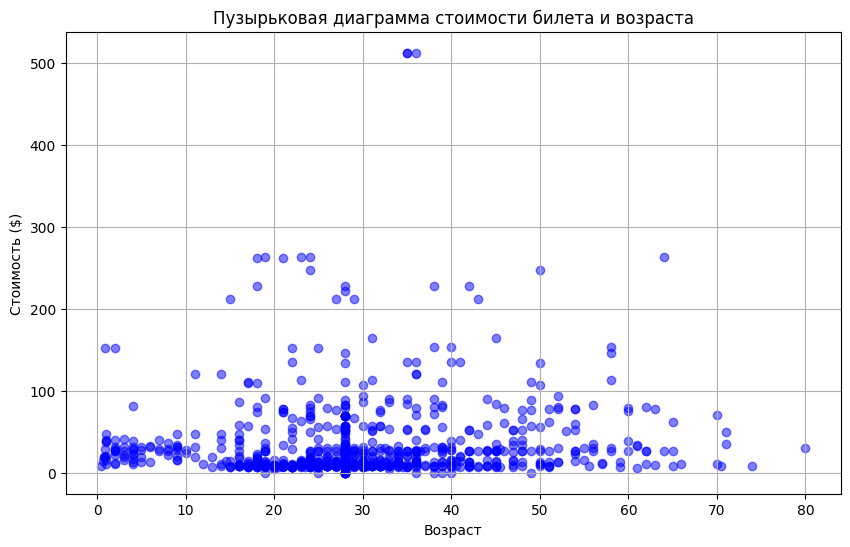

0.097


In [51]:
# your code here

# Вычисление корреляции между ценой билета и возрастом пассажиров
correlation = data_cleaned["Fare"].corr(data_cleaned["Age"])

# Построение диаграммы рассеяния для цены билета и возраста пассажиров
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned["Age"], data_cleaned["Fare"], alpha=0.5, color='blue')
plt.title("Пузырьковая диаграмма стоимости билета и возраста")
plt.xlabel("Возраст")
plt.ylabel("Стоимость ($)")
plt.grid(True)
plt.show()

print(round(correlation, 3))


### 8

Правда ли, что пассажиры с более дорогими билетами выживали чаще? Есть ли зависимость выживаемости от класса? Обосновать ответ!

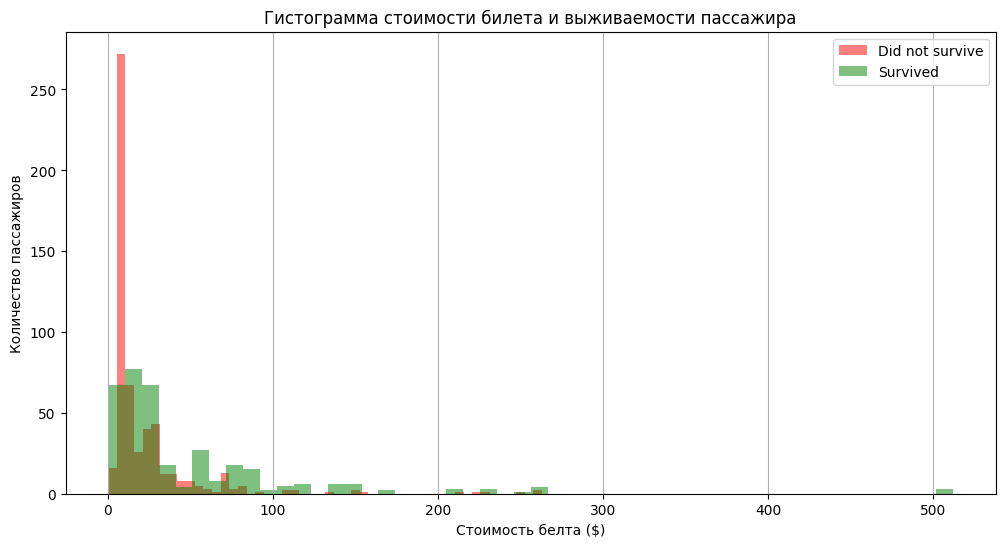

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [50]:
# your code here


# Визуализация распределения цен на билеты среди выживших и погибших пассажиров
plt.figure(figsize=(12, 6))

# Построение гистограммы для погибших пассажиров
data_cleaned[data_cleaned["Survived"] == 0]["Fare"].hist(
    bins=50, alpha=0.5, label="Did not survive", color='red'
)

# Построение гистограммы для выживших пассажиров
data_cleaned[data_cleaned["Survived"] == 1]["Fare"].hist(
    bins=50, alpha=0.5, label="Survived", color='green'
)

plt.title("Гистограмма стоимости билета и выживаемости пассажира")
plt.xlabel("Стоимость белта ($)")
plt.ylabel("Количество пассажиров")
plt.legend()
plt.grid(axis='y')
plt.show()

# Рассчитать средние значения стоимости билета для выживших и погибших пассажиров
average_fare_by_survival = data_cleaned.groupby("Survived")["Fare"].mean()
average_fare_by_survival


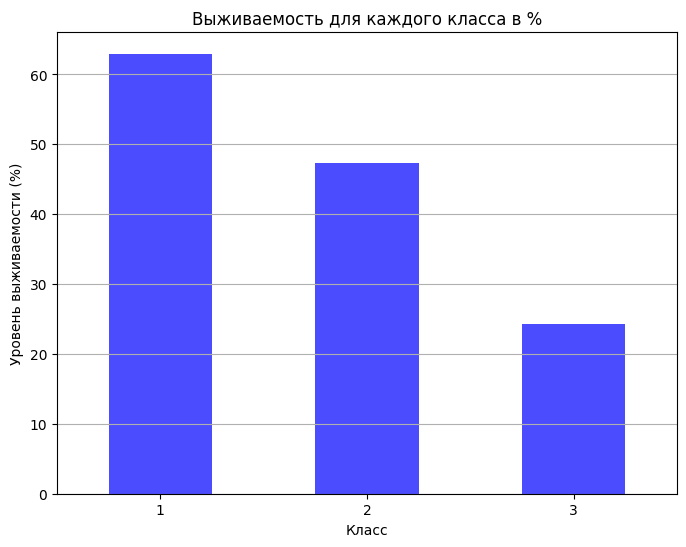

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [48]:
# Рассчет процента выживаемости для каждого класса
survival_rate_by_class = data_cleaned.groupby("Pclass")["Survived"].mean() * 100

# Построение столбчатой диаграммы выживаемости для каждого класса
plt.figure(figsize=(8, 6))
survival_rate_by_class.plot(kind="bar", color='blue', alpha=0.7)
plt.title("Выживаемость для каждого класса в %")
plt.xlabel("Класс")
plt.ylabel("Уровень выживаемости (%)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

survival_rate_by_class


### 9

Создание признаков (Feature engineering) — одно из основных средств повышения качества алгоритмов машинного обучения на этапе обработки данных, а также отличный способ улучшить качество выводов из анализа в целом! Добавьте в таблицу столбец, который будет показывать, сколько родственников плыло с пассажиром на корабле, включая его самого. Чем такой атрибут может быть полезен?

In [52]:
# your code here

# Добавление столбца с общим количеством родственников на борту вместе с пассажиром
data_cleaned["RelativesOnboard"] = data_cleaned["SibSp"] + data_cleaned["Parch"] + 1

data_cleaned[["SibSp", "Parch", "RelativesOnboard"]].head()


,SibSp,Parch,RelativesOnboard
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


### 10

Теперь придумайте свой признак, который может быть полезен для анализа (несёт некоторую информацию), и добавьте его в таблицу. Обязательно объясните, почему ваш признак полезен.

In [54]:
# your code here

# Создание признака IsAlone
data_cleaned["IsAlone"] = 0
data_cleaned.loc[data_cleaned["RelativesOnboard"] == 1, "IsAlone"] = 1

data_cleaned[["RelativesOnboard", "IsAlone"]].head()


,RelativesOnboard,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


Пассажиры, путешествующие в одиночку, могли действовать иначе, чем те, кто путешествовал с семьей. Например, одиночные пассажиры могли быстрее реагировать на опасные ситуации без необходимости заботиться о родственниках.

### 11

Придумайте какую-нибудь интересную задачу для анализа предложенных данных и решите ее.

*Например, какая фамилия была самой популярной на корабле? (Лучше не использовать этот пример, а придумать что-то свое)*

Задача: Анализировать влияние наличия родственников на борту на шансы выживания в разных классах.

Почему это интересно: Мы уже рассмотрели, как класс и наличие родственников могут влиять на шансы выживания отдельно. Однако комбинированный анализ может показать, как эти два фактора взаимодействуют между собой. Например, возможно, пассажиры первого класса, путешествующие одни, имели больше шансов выжить, чем те, кто путешествовал с семьей, из-за более быстрого доступа к шлюпкам.

Давайте проанализируем данные и узнаем, как наличие родственников и класс взаимодействуют между собой в отношении выживаемости.

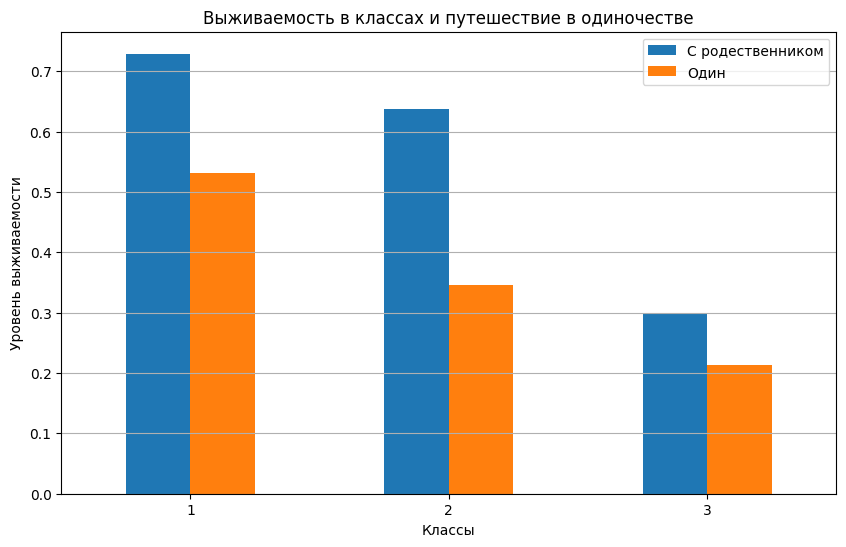

IsAlone,0,1
Pclass,,
1,0.728972,0.532110
2,0.637500,0.346154
3,0.299401,0.212963


In [56]:
# your code here

# Группировка данных по классу и признаку IsAlone для вычисления среднего значения выживаемости
survival_by_class_and_alone = data_cleaned.groupby(["Pclass", "IsAlone"])["Survived"].mean()

# Визуализация результатов
plt.figure(figsize=(10, 6))
survival_by_class_and_alone.unstack().plot(kind='bar', ax=plt.gca())
plt.title("Выживаемость в классах и путешествие в одиночестве")
plt.xlabel("Классы")
plt.ylabel("Уровень выживаемости")
plt.xticks(rotation=0)
plt.legend(["С родественником", "Один"])
plt.grid(axis='y')
plt.show()

survival_by_class_and_alone.unstack()


В целом, во всех классах пассажиры, путешествующие с родственниками, имели больше шансов на выживание, чем одиночные пассажиры. Это может указывать на то, что семьи или группы родственников могли помогать друг другу или действовать согласованно в экстренных ситуациях, что увеличивало их шансы на выживание.​

### 12

Постройте гистограммы распределения **числовых** признаков. Есть ли у них разница? Чем это может быть плохо с точки зрения анализа данных и с точки зрения машинного обучения? Нормализуйте реальные признаки и посмотрите, как изменилась ситуация. Какие выводы можно сделать из проделанной работы?

In [ ]:
# your code here

# Визуализация результатов
plt.figure(figsize=(10, 6))
survival_by_class_and_alone.unstack().plot(kind='bar', ax=plt.gca())
plt.title("Выживаемость в классах и путешествие в одиночестве")
plt.xlabel("Классы")
plt.ylabel("Уровень выживаемости")
plt.xticks(rotation=0)
plt.legend(["С родественником", "Один"])
plt.grid(axis='y')
plt.show()

survival_by_class_and_alone.unstack()


### 13

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы.

In [58]:
# your code here

data_encoded = pd.get_dummies(data_cleaned, columns=["Sex", "Cabin", "Embarked"], drop_first=True)

data_encoded.tail()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,RelativesOnboard,IsAlone,Sex_male,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,13.00,1,1,1,...,0,0,0,0,0,0,0,1,0,1
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.00,1,1,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,23.45,4,0,0,...,0,0,0,0,0,0,0,1,0,1
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,30.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
890,0,3,"Dooley, Mr. Patrick",32.0,0,0,7.75,1,1,1,...,0,0,0,0,0,0,0,1,1,0


In [59]:
from sklearn.preprocessing import LabelEncoder

# Создаем экземпляр LabelEncoder
encoder = LabelEncoder()

# Преобразуем столбец Cabin
data_encoded["Cabin"] = encoder.fit_transform(data_cleaned["Cabin"])

# Удаляем столбцы one-hot encoding для Cabin из предыдущего шага
columns_to_drop = [col for col in data_encoded if col.startswith("Cabin_")]
data_encoded.drop(columns=columns_to_drop, inplace=True)

data_encoded.head()


,Survived,Pclass,Name,Age,SibSp,Parch,Fare,RelativesOnboard,IsAlone,Sex_male,Embarked_Q,Embarked_S,Cabin
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,2,0,1,0,1,147
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,2,0,0,0,0,81
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,1,0,0,1,147
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,2,0,0,0,1,55
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,1,1,0,1,147
